# Highly Relevant Words 
Sustainability
Renewable
Resources
Conservation
Biodiversity
Emissions
Carbon footprint
Recycling
Green energy
Ecosystem
Solar power
Wind energy
Climate change
Circular economy
Net-zero
Decarbonization
Waste reduction
Water conservation
Energy efficiency
Pollution
Habitat preservation
Carbon neutrality
Deforestation
Sustainable agriculture
Environmental impact
Organic farming
Solar panels
Green infrastructure
Reforestation
Clean energy
Zero waste
Environmental protection
Renewable resources
Ecosystem restoration
Sustainable materials
Wildlife protection
Greenhouse gases
Ecological balance
Resource management
Eco-friendly
Clean technology
Low carbon
Sustainable cities
Climate action
Environmental sustainability
Water management
Soil health
Carbon capture
Green policies
Sustainable practices
# Moderately Relevant Words 
Environmentalism
Public health
Resilience
Green jobs
Urban planning
Food security
Eco-tourism
Land management
Agroforestry
Sustainable fashion
Energy transition
Emission trading
Green finance
Environmental justice
Land use
Adaptation
Climate resilience
Green bonds
Eco-design
Sustainable tourism
Organic products
Natural resources
Carbon offsetting
Urban sustainability
Sustainable business
Pollution control
Nature conservation
Environmental awareness
Carbon pricing
Air quality
Habitat loss
Forest management
Coastal erosion
Environmental footprint
Biodegradable
Smart cities
Nature-based solutions
Low-emission zones
Environmental standards
Wildlife conservation
Renewable industry
Wastewater treatment
Alternative energy
Eco-innovation
Social equity
Renewable investment
Green chemistry
Climate finance
Crop rotation
Clean transport
# Slightly Relevant Words 
Urbanization
Economy
Policy-making
Economic growth
Innovation
Infrastructure
Corporate responsibility
Stakeholders
Social enterprise
Public policy
Community
Technology
Trade
Development
Economic policy
Corporate governance
Investment
Education
Job creation
Livelihood
Consumer behavior
Ethics
Market trends
Leadership
Business models
Entrepreneurship
Digital transformation
Corporate social responsibility
Diversity
Public transportation
Rural development
Social impact
Supply chain
Global economy
Partnerships
Health systems
Microfinance
Civic engagement
Transparency
Social responsibility
Government regulations
Community development
Knowledge sharing
Green branding
Rural economy
Economic stability
Policy frameworks
Global partnerships
Technological advancement
Financial incentives

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
india = pd.read_csv("India.csv")
brazil = pd.read_csv("./Brazil.csv")
bangladesh = pd.read_csv("./bangladesh.csv")
nepal = pd.read_csv("./Nepal.csv")
usa = pd.read_csv("./USA.csv")
swiss = pd.read_csv("./Switzerland.csv")
developing = pd.read_csv("./final-developing.csv")
under = pd.read_csv("./final-under-developing.csv")

In [3]:
developing.drop("Unnamed: 0" , axis = 1 , inplace = True)

In [4]:
under.drop("Unnamed: 0" , axis = 1 , inplace = True)

In [5]:
highly = "Sustainability Renewable Resources Conservation Biodiversity Emissions Carbon footprint Recycling Green energy Ecosystem Solar power Wind energy Climate change Circular economy Net-zero Decarbonization Waste reduction Water conservation Energy efficiency Pollution Habitat preservation Carbon neutrality Deforestation Sustainable agriculture Environmental impact Organic farming Solar panels Green infrastructure Reforestation Clean energy Zero waste Environmental protection Renewable resources Ecosystem restoration Sustainable materials Wildlife protection Greenhouse gases Ecological balance Resource management Eco-friendly Clean technology Low carbon Sustainable cities Climate action Environmental sustainability Water management Soil health Carbon capture Green policies Sustainable practices"
highly = highly.split(" ")

In [6]:
moderately = "Environmentalism Public health Resilience Green jobs Urban planning Food security Eco-tourism Land management Agroforestry Sustainable fashion Energy transition Emission trading Green finance Environmental justice Land use Adaptation Climate resilience Green bonds Eco-design Sustainable tourism Organic products Natural resources Carbon offsetting Urban sustainability Sustainable business Pollution control Nature conservation Environmental awareness Carbon pricing Air quality Habitat loss Forest management Coastal erosion Environmental footprint Biodegradable Smart cities Nature-based solutions Low-emission zones Environmental standards Wildlife conservation Renewable industry Wastewater treatment Alternative energy Eco-innovation Social equity Renewable investment Green chemistry Climate finance Crop rotation Clean transport"
moderately = moderately.split(" ")

In [7]:
slightly = "Urbanization Economy Policy-making Economic growth Innovation Infrastructure Corporate responsibility Stakeholders Social enterprise Public policy Community Technology Trade Development Economic policy Corporate governance Investment Education Job creation Livelihood Consumer behavior Ethics Market trends Leadership Business models Entrepreneurship Digital transformation Corporate social responsibility Diversity Public transportation Rural development Social impact Supply chain Global economy Partnerships Health systems Microfinance Civic engagement Transparency Social responsibility Government regulations Community development Knowledge sharing Green branding Rural economy Economic stability Policy frameworks Global partnerships Technological advancement Financial incentives"
slightly = slightly.split(" ")

In [8]:
new_developing = developing.dropna()

In [9]:
developing_title_score = {"highly":[],"moderately":[],"slightly":[]}
developing_content_score = {"highly":[],"moderately":[],"slightly":[]}
for i in new_developing.index:
    current_title = new_developing['Title'][i].split(" ")
    current_content = new_developing['Content'][i].split(" ")
    h = 0
    m = 0
    s = 0
    for j in current_title:
        if j in highly:
            h += 1
        if j in moderately:
            m += 1
        if s in slightly:
            s += 1
    developing_title_score['highly'].append(h)
    developing_title_score['moderately'].append(m)
    developing_title_score['slightly'].append(s)
    h = 0
    m = 0
    s = 0
    for x in current_content:
        if x in highly:
            h += 1
        if x in moderately:
            m += 1
        if x in slightly:
            s += 1
    developing_content_score['highly'].append(h)
    developing_content_score['moderately'].append(m)
    developing_content_score['slightly'].append(s)

In [10]:
developingtscore = pd.DataFrame(developing_title_score)
developingcscore = pd.DataFrame(developing_content_score)

In [11]:
developingtscore.columns = ['T-highly' , 'T-moderately','T-slightly']
developingcscore.columns = ['C-highly','C-moderately',"C-slightly"]

In [12]:
final_developing = pd.DataFrame({
    "Title": list(new_developing['Title']),
    "Content": list(new_developing['Content']),
    "T-highly": developing_title_score['highly'],
    "T-moderately": developing_title_score['moderately'],
    "T-slightly" : developing_title_score['slightly'],
    "C-highly" : developing_content_score['highly'],
    "C-moderately": developing_content_score['moderately'],
    "C-slightly":developing_content_score['slightly']
})

In [13]:
def score(n1,n2,n3):
    score = 1*n1 + 0.5*n2 + 0.2*n3
    return score

In [14]:
Tscore = []
Cscore = []
for i in final_developing.index:
    tscore = score(final_developing['T-highly'][i],final_developing["T-moderately"][i],final_developing["T-slightly"][i])
    cscore = score(final_developing['C-highly'][i],final_developing["C-moderately"][i],final_developing["C-slightly"][i])
    Tscore.append(tscore)
    Cscore.append(cscore)

In [15]:
final_developing['T-score'] = Tscore
final_developing['C-score'] = Cscore

In [16]:
final_developing.to_csv("final-developing.csv")

In [17]:
new_under = under.dropna()
under_title_score = {"highly":[],"moderately":[],"slightly":[]}
under_content_score = {"highly":[],"moderately":[],"slightly":[]}
utscore = []
ucscore = []
for i in new_under.index:
    current_title = new_under['Title'][i].split(" ")
    current_content = new_under['Content'][i].split(" ")
    h = 0
    m = 0
    s = 0
    for j in current_title:
        if j in highly:
            h += 1
        if j in moderately:
            m += 1
        if s in slightly:
            s += 1
    under_title_score['highly'].append(h)
    under_title_score['moderately'].append(m)
    under_title_score['slightly'].append(s)
    utscore.append(score(h,m,s))
    h = 0
    m = 0
    s = 0
    for x in current_content:
        if x in highly:
            h += 1
        if x in moderately:
            m += 1
        if x in slightly:
            s += 1
    under_content_score['highly'].append(h)
    under_content_score['moderately'].append(m)
    under_content_score['slightly'].append(s)
    ucscore.append(score(h,m,s))

In [18]:
new_under['T-highly'] = under_title_score['highly']
new_under['T-moderately'] = under_title_score['moderately']
new_under['T-slightly'] = under_title_score['slightly']
new_under['C-highly'] = under_content_score['highly']
new_under['C-moderately'] = under_content_score['moderately']
new_under['C-slightly'] = under_content_score['slightly']
new_under['T-score'] = utscore
new_under['C-score'] = ucscore

In [19]:
totalu = []
for i in new_under.index:
    totalu.append(new_under['T-score'][i] + new_under['C-score'][i])
new_under['Total-Score'] = totalu

In [20]:
totalu = []
for i in final_developing.index:
    totalu.append(final_developing['T-score'][i] + final_developing['C-score'][i])
final_developing['Total-Score'] = totalu

In [21]:
final_developing.to_csv("final-developing.csv")
new_under.to_csv("final-under-developing.csv")

In [22]:
usa = pd.read_csv("./USA.csv")

In [23]:
usa.drop("Unnamed: 0",axis = 1,inplace = True)
# swiss.drop("Unnamed: 0", axis = 1 , inplace = True)

In [24]:
usa['date'] = 2024

In [25]:
usa.head(5)

,title,article,date
0,Papaya Homes Revolutionizes Precision-Engineer...,Papaya Homes has created a ‘True Housing Solut...,2024
1,Sustainability as a Driver of Success: Lessons...,Sustainability has become a crucial aspect of ...,2024
2,Hurricane Kristy tracker: Category 4 storm exp...,Hurricane Kristy strengthened into a Category ...,2024
3,LeBron and Bronny playing together with Lakers...,The Los Angeles Lakers had their moments in th...,2024
4,Most teachers don't recommend teaching. 3 ways...,More than half of elementary school teachers d...,2024


In [26]:
usa.columns = ['Title','Content','date']

In [27]:
developed = pd.concat([usa,swiss])

In [28]:
developed.index = range(0,len(developed['Title']))

In [29]:
new_developed=developed.dropna()

In [30]:
new_developed

,Title,Content,date,Unnamed: 0
843,Wall Street Shuns Risk Before Coin-Toss Electi...,(Bloomberg) — Stocks failed to gain traction a...,"November 5, 2024 - 13:58",0.0
844,UK Labour promises ‘new towns’ to tackle housi...,LONDON (Reuters) – Britain’s opposition Labour...,"May 20, 2024 - 23:32",1.0
845,"EU’s Borrell to discuss security, climate poli...",By Francesco GuarascioHANOI (Reuters) – Europe...,"July 22, 2024 - 11:02",2.0
846,Swiss students drive rocket research forward,Audrey Vorburger conducts research on space in...,"September 27, 2024 - 09:00",3.0
847,Save the dates: a ‘year of democracy’,More than twice as many people will be called ...,"January 3, 2024 - 16:00",4.0
...,...,...,...,...
1153,Barclays investors crave simpler bank as CEO V...,By Sinead Cruise and Lawrence WhiteLONDON (Reu...,"February 9, 2024 - 18:02",310.0
1154,"Stocks Climb on Bets Fed, ECB Closer to Rate C...",(Bloomberg) — Stocks hit all-time highs in the...,"March 19, 2024 - 13:00",311.0
1155,SNB Didn’t Reveal Full Carbon Footprint in Rep...,(Bloomberg) — The Swiss National Bank’s carbon...,"April 15, 2024 - 15:40",312.0
1156,Apple offers modest growth outlook after iPhon...,By Stephen Nellis(Reuters) -Apple’s AI-enhance...,"October 31, 2024 - 23:54",313.0


In [31]:
DTscore = []
DCscore = []
developed_title_score = {"highly":[],"moderately":[],"slightly":[]}
developed_content_score = {"highly":[],"moderately":[],"slightly":[]}
for i in new_developed.index:
    current_title = new_developed['Title'][i].split(" ")
    current_content = new_developed['Content'][i].split(" ")
    h = 0
    m = 0
    s = 0
    for j in current_title:
        if j in highly:
            h += 1
        if j in moderately:
            m += 1
        if s in slightly:
            s += 1
    developed_title_score['highly'].append(h)
    developed_title_score['moderately'].append(m)
    developed_title_score['slightly'].append(s)
    DTscore.append(score(h,m,s))
    h = 0
    m = 0
    s = 0
    for x in current_content:
        if x in highly:
            h += 1
        if x in moderately:
            m += 1
        if x in slightly:
            s += 1
    developed_content_score['highly'].append(h)
    developed_content_score['moderately'].append(m)
    developed_content_score['slightly'].append(s)
    DCscore.append(score(h,m,s))

In [32]:
new_developed['T-highly'] = developed_title_score['highly']
new_developed['T-moderately'] = developed_title_score['moderately']
new_developed['T-slightly'] = developed_title_score['slightly']
new_developed['C-highly'] = developed_content_score['highly']
new_developed['C-moderately'] = developed_content_score['moderately']
new_developed['C-slightly'] = developed_content_score['slightly']
new_developed['T-score'] = DTscore
new_developed['C-score'] = DCscore

/var/folders/r8/tc8fh7zs0y515b3k3v3wqq0m0000gn/T/ipykernel_4383/2785455816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_developed['T-highly'] = developed_title_score['highly']
/var/folders/r8/tc8fh7zs0y515b3k3v3wqq0m0000gn/T/ipykernel_4383/2785455816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_developed['T-moderately'] = developed_title_score['moderately']
/var/folders/r8/tc8fh7zs0y515b3k3v3wqq0m0000gn/T/ipykernel_4383/2785455816.py:3: SettingWithCopyWarning: 
A value is trying to be 

In [33]:
new_developed['Total-score'] = new_developed['T-score'] + new_developed['C-score']

/var/folders/r8/tc8fh7zs0y515b3k3v3wqq0m0000gn/T/ipykernel_4383/4287119873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_developed['Total-score'] = new_developed['T-score'] + new_developed['C-score']


In [34]:
dt_h = max(new_developed['T-highly'])
dt_m = max(new_developed['T-moderately'])
dt_s = max(new_developed['T-slightly'])
dc_h = max(new_developed['C-highly'])
dc_m = max(new_developed['C-moderately'])
dc_s = max(new_developed['C-slightly'])
dt_score = max(new_developed['T-score'])
dc_score = max(new_developed['C-score'])
dc_min = min(new_developed['C-score'])
t_h = max(developing['T-highly'])
t_m = max(developing['T-moderately'])
t_s = max(developing['T-slightly'])
c_h = max(developing['C-highly'])
c_m = max(developing['C-moderately'])
c_s = max(developing['C-slightly'])
t_score = max(developing['T-score'])
c_score = max(developing['C-score'])
c_min = min(developing['C-score'])
ut_h = max(under['T-highly'])
ut_m = max(under['T-moderately'])
ut_s = max(under['T-slightly'])
uc_h = max(under['C-highly'])
uc_m = max(under['C-moderately'])
uc_s = max(under['C-slightly'])
ut_score = max(under['T-score'])
uc_score = max(under['C-score'])
uc_min = min(under['C-score'])

In [35]:
comparison = {
    "type" : ['Under-developed','Developing','Developed'],
    "T-highly":[ut_h,t_h,dt_h],
    "T-moderately":[ut_m,t_m,dt_m],
    "T-slightly":[ut_s,t_s,dt_s],
    "C-highly":[uc_h,c_h,dc_h],
    "C-moderately":[uc_m,c_m,dc_m],
    "C-slightly":[uc_s,c_s,dc_s],
    "T-score":[ut_score,t_score,dt_score],
    "C-score":[uc_score,c_score,dc_score],
    "Max-total-score":[max(under['Total-Score']),max(developing['Total-Score']),max(new_developed['Total-score'])]
}

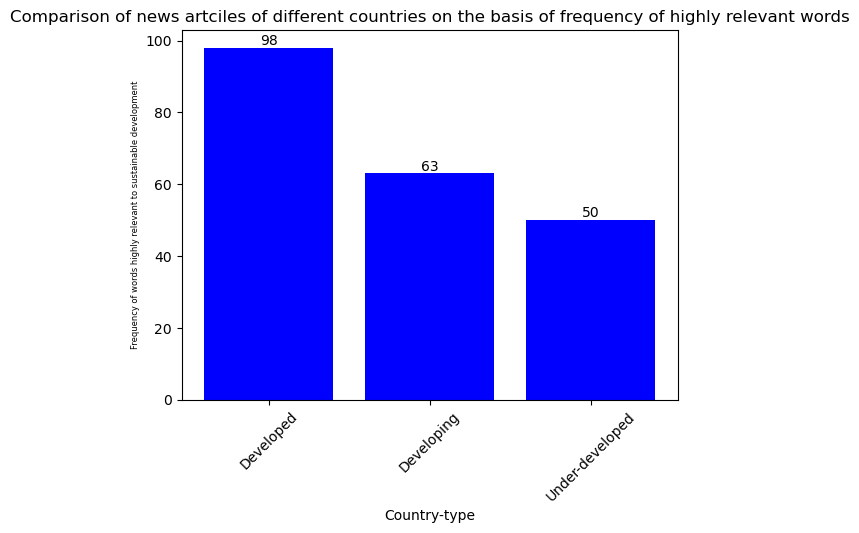

In [36]:
plt.bar(['Developed','Developing','Under-developed'],comparison['C-highly'],color = 'blue')
plt.xticks(rotation=45)
plt.xlabel("Country-type")
for i, value in enumerate(comparison['C-highly']):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.ylabel("Frequency of words highly relevant to sustainable development" , size = 6)
plt.title("Comparison of news artciles of different countries on the basis of frequency of highly relevant words");

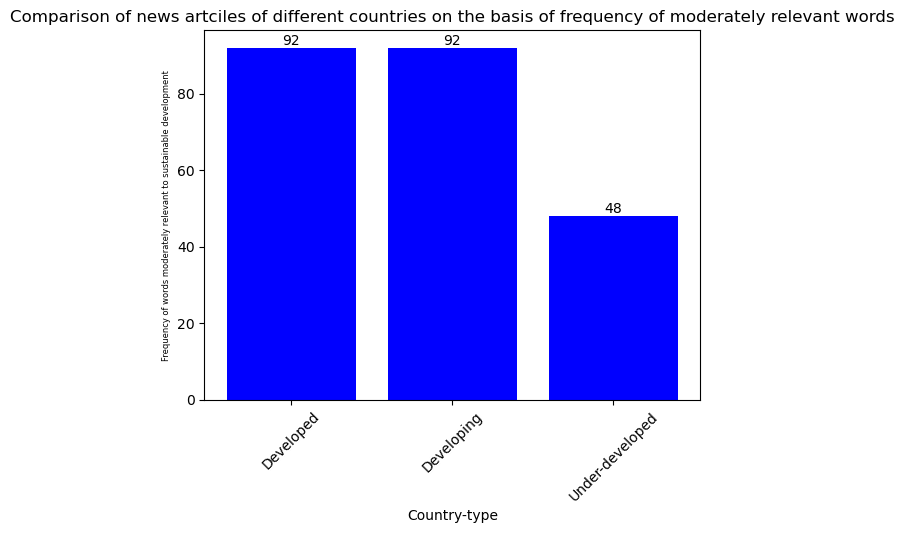

In [37]:
plt.bar(['Developed','Developing','Under-developed'],comparison['C-moderately'],color = 'blue')
plt.xticks(rotation=45)
plt.xlabel("Country-type")
for i, value in enumerate(comparison['C-moderately']):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.ylabel("Frequency of words moderately relevant to sustainable development" , size = 6)
plt.title("Comparison of news artciles of different countries on the basis of frequency of moderately relevant words");

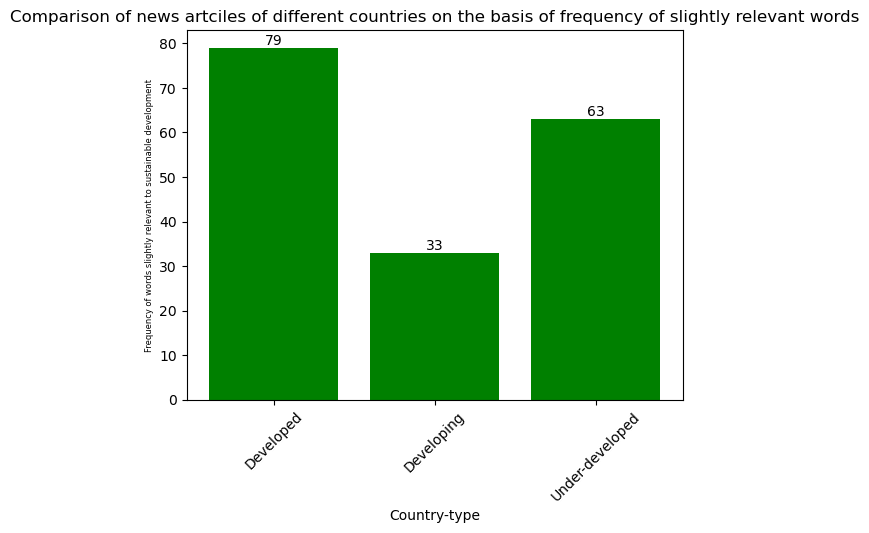

In [38]:
plt.bar(['Developed','Developing','Under-developed'],comparison['C-slightly'],color = 'green')
plt.xticks(rotation=45)
plt.xlabel("Country-type")
for i, value in enumerate(comparison['C-slightly']):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.ylabel("Frequency of words slightly relevant to sustainable development" , size = 6)
plt.title("Comparison of news artciles of different countries on the basis of frequency of slightly relevant words");

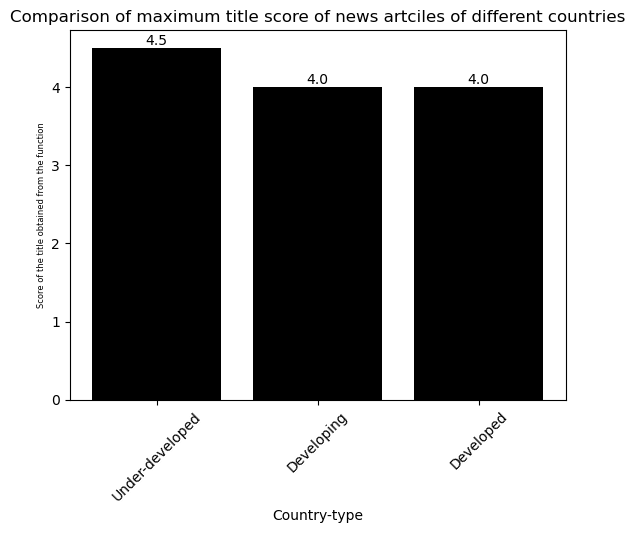

In [39]:
plt.bar(comparison['type'],comparison['T-score'],color = 'black')
plt.xticks(rotation=45)
plt.xlabel("Country-type")
for i, value in enumerate(comparison['T-score']):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.ylabel("Score of the title obtained from the function" , size = 6)
plt.title("Comparison of maximum title score of news artciles of different countries");

In [40]:
new_developed.to_csv("final-developed.csv")

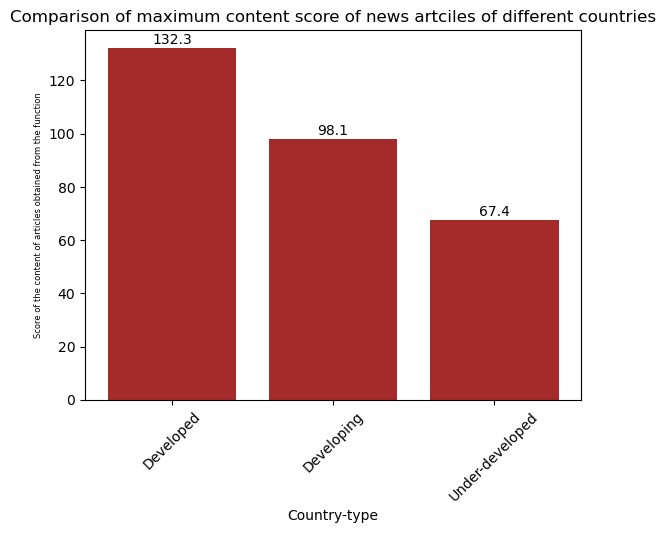

In [41]:
plt.bar(['Developed','Developing','Under-developed'],comparison['C-score'],color = 'brown')
plt.xticks(rotation=45)
plt.xlabel("Country-type")
for i, value in enumerate(comparison['C-score']):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')
plt.ylabel("Score of the content of articles obtained from the function" , size = 6)
plt.title("Comparison of maximum content score of news artciles of different countries");

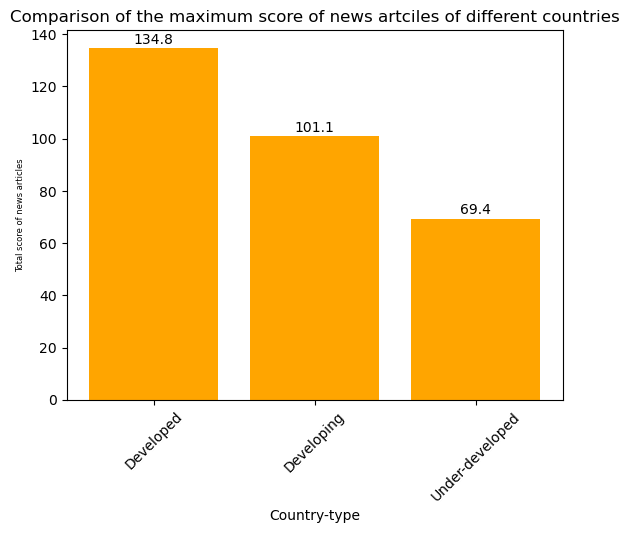

In [42]:
plt.bar(['Developed','Developing','Under-developed'],comparison['Max-total-score'],color = 'orange')
plt.xticks(rotation=45)
plt.xlabel("Country-type")
for i, value in enumerate(comparison['Max-total-score']):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')
plt.ylabel("Total score of news articles" , size = 6)
plt.title("Comparison of the maximum score of news artciles of different countries");